<h1 style="text-align: center;">
    The Analyst Challenge<br><br>
    Advertising Campaign Performance Dataset<br>
</h1>  


## 1. Giới thiệu về challenge

### Bối Cảnh
Việc phân tích hiệu quả quảng cáo (***ad performance***) và tối ưu ngân sách marketing là yếu tố then chốt giúp doanh nghiệp tăng trưởng bền vững.  
Dựa trên bộ dữ liệu thực tế từ nhiều chiến dịch quảng cáo đa kênh, đa mục tiêu, đa phân khúc khách hàng và nhiều địa phương/ngôn ngữ khác nhau, bạn sẽ khám phá các yếu tố tạo nên ROI cao, nhắm đúng đối tượng và cải thiện conversion rate.  

Trong thử thách này, bạn sẽ sử dụng Power BI để phân tích dữ liệu campaign từ nhiều lĩnh vực, nhiều vùng địa lý, và tìm ra chiến lược/cách tiếp cận hiệu quả nhất.

### Yêu Cầu
Bạn cần sử dụng `Power BI` để:

- Phân tích hiệu quả các campaign trên nhiều channel/platform khác nhau (ví dụ: Twitter, Instagram…)
- So sánh hiệu quả theo target audience, location, language, campaign goal và customer segment.
- Xác định các yếu tố mang lại ROI, conversion rate cao, cũng như hiệu quả chi phí (cost efficiency).
- Trực quan hóa các chỉ số: impressions, clicks, spend, conversion rate, ROI.
- Xây dựng dashboard tương tác dành cho các decision-maker trong doanh nghiệp để theo dõi hiệu quả campaign.
- Đưa ra đề xuất cụ thể, dựa trên dữ liệu để tối ưu các chiến dịch quảng cáo tiếp theo.

### Mô Tả Dữ Liệu

#### Tổng Quan
- Bộ dữ liệu cung cấp thông tin chi tiết về hoạt động của các chiến dịch quảng cáo đa kênh, đa mục tiêu. Nó được thiết kế để giúp doanh nghiệp phân tích hiệu quả ngân sách, hiệu suất chuyển đổi, ROI và hành vi khách hàng theo từng khu vực và phân khúc thị trường.
- Bộ dữ liệu này lý tưởng để khám phá chiến lược marketing hiệu quả nhất, xác định yếu tố nào mang lại kết quả tốt, từ đó tối ưu ngân sách và nâng cao tỷ lệ chuyển đổi.

#### Cấu Trúc Dữ Liệu
Bộ dữ liệu bao gồm nhiều cột, mỗi cột đại diện cho một khía cạnh quan trọng của hiệu quả chiến dịch quảng cáo:

| **Cột**             | **Mô tả**                                         |
|:--------------------|---------------------------------------------------|
| Campaign_ID        | Mã chiến dịch                                     |
| Target_Audience    | Đối tượng mục tiêu (ví dụ: Women 25-34, Men 25-34...) |
| Campaign_Goal      | Mục tiêu campaign (Brand Awareness, Increase Sales, Market Expansion, ...) |
| Duration           | Thời lượng chiến dịch (30 Days, 60 Days, ...)     |
| Channel_Used       | Kênh/platform chạy quảng cáo (Twitter, Instagram, ...) |
| Conversion_Rate    | Tỷ lệ chuyển đổi (%)                              |
| Spend              | Ngân sách chi tiêu (USD)                          |
| ROI                | Return on Investment                              |
| Location           | Địa điểm (city/region)                            |
| Language           | Ngôn ngữ campaign                                 |
| Clicks             | Số lượt click                                     |
| Impressions        | Số lượt hiển thị                                  |
| Customer_Segment   | Nhóm khách hàng (ví dụ: Fashion, Food, ...)       |
| Date               | Ngày chạy campaign                                |
| Company            | Tên công ty                                       |


## 2. Tiền xử lý dữ liệu

### Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)
import warnings
import matplotlib.ticker as mtick
warnings.filterwarnings('ignore')

In [2]:
filepath = "../dataset/ads_campaign_dataset.csv"
data = pd.read_csv(filepath)
data.head()

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Spend,ROI,Location,Language,Clicks,Impressions,Customer_Segment,Date,Company
0,578191,Women 25-34,Brand Awareness,30 Days,Twitter,"0,12","6924,23","6,96",New York,French,17993,54817,Fashion,2022-12-31 00:00:00,Chic Couture
1,737574,Men 25-34,Increase Sales,30 Days,Twitter,"0,13","5244,02","2,11",Las Vegas,French,13441,41332,Fashion,2022-03-16 00:00:00,Mode Maven
2,199313,Women 25-34,Brand Awareness,30 Days,Twitter,"0,14","4998,43","4,68",Miami,English,12767,39336,Food,2022-06-07 00:00:00,Epicurean Edge
3,163358,Women 25-34,Market Expansion,30 Days,Instagram,"0,13","6687,44","5,58",Las Vegas,English,17343,52889,Food,2022-10-04 00:00:00,Bistro Bliss
4,149567,Women 18-24,Market Expansion,60 Days,Instagram,"0,13","14346,04","6,42",Las Vegas,English,37355,112167,Fashion,2022-11-05 00:00:00,Trend Tailors


### Dữ liệu có bao nhiêu cột? Bao nhiêu dòng?

In [3]:
print("Dữ liệu có", data.shape[0], "dòng và", data.shape[1], "cột")

Dữ liệu có 8047 dòng và 15 cột


### Dữ liệu có bị thiếu không? Nếu có thì in ra tên cột và số lượng thiếu tương ứng.

In [4]:
null_counts = data.isnull().sum()

if (null_counts == 0).all():
    print("Dữ liệu không bị thiếu.")
else:
    print("Dữ liệu bị thiếu ở các cột sau:")
    print(null_counts[null_counts > 0])

Dữ liệu không bị thiếu.


### Từng cột đang có kiểu dữ liệu là gì? Có phù hợp hay chưa?

In [5]:
# Tự động tối ưu kiểu dữ liệu
# data = data.convert_dtypes()
# Xuất kiểu dữ liệu sau khi tối ưu
def df_types(data):
    return pd.DataFrame({ "Data Type": data.dtypes.astype(str) })
df_types(data)

,Data Type
Campaign_ID,int64
Target_Audience,object
Campaign_Goal,object
Duration,object
Channel_Used,object
Conversion_Rate,object
Spend,object
ROI,object
Location,object
Language,object


`Conversion_Rate`, `Spend` và `ROI` kỳ vọng có dạng float. Cột `Date` cần chuyển sang dạng DateTime

In [6]:
# Chuyển đổi 3 cột sang float
cols_float = ['Conversion_Rate', 'Spend', 'ROI']
for col in cols_float:
    # Bước 1: thay dấu , thành dấu .
    data[cols_float] = data[cols_float].apply(lambda x: x.astype(str)
                                              .str.replace(',', '.', regex=False))
    
    # Bước 2: chuyển sang float
    data[cols_float] = data[cols_float].astype(float)

In [7]:
# Chuyển đổi Date sang datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Kiểm tra xem Date có phải chỉ chứa "YYYY-MM-DD 00:00:00" không
date_format_check = (data['Date'].dt.hour.eq(0) &
                     data['Date'].dt.minute.eq(0) &
                     data['Date'].dt.second.eq(0))

if date_format_check.all():
    print("✅ Cột Date chỉ chứa ngày tháng năm, phần giờ phút giây đều bằng 0.")
else:
    print("⚠️ Cột Date có chứa dữ liệu giờ phút giây khác 0.")

✅ Cột Date chỉ chứa ngày tháng năm, phần giờ phút giây đều bằng 0.


**Quan sát:**  
Cột `Target_Audience` hiện đang chứa thông tin kết hợp giữa giới tính và nhóm tuổi, ví dụ: `"Women 25-34"`, `"Men 18-24"`. Điều này đồng nghĩa một cột đang biểu diễn hai đặc tính khác nhau của dữ liệu.

**Ý nghĩa:**  
- Phần chữ (`Women`, `Men`) thể hiện **giới tính** của nhóm khách hàng.  
- Phần số (`25-34`, `18-24`) thể hiện **nhóm tuổi** (khoảng tuổi) của nhóm khách hàng.  

**Kết luận:**  
Để thuận tiện cho việc phân tích, lọc, và thống kê theo từng đặc tính riêng, cần tách `Target_Audience` thành hai cột:  
- `Gender`: chứa thông tin giới tính.  
- `Age_Group`: chứa thông tin nhóm tuổi.


In [8]:
# Thực hiện split cột
data[['Gender', 'Age_Group']] = data['Target_Audience'].str.split(' ', n=1, expand=True)
# Drop cột dữ liệu gốc
data.drop(columns=['Target_Audience'], inplace=True)

Các cột có kiểu dữ liệu là `object` cần chuyển sang `string`.

In [9]:
# Chuyển toàn bộ cột object sang string dtype
obj_cols = data.select_dtypes(include='object').columns
data[obj_cols] = data[obj_cols].astype('string')

In [10]:
print("Dữ liệu sau chuyển đổi")
df_types(data)

Dữ liệu sau chuyển đổi


,Data Type
Campaign_ID,int64
Campaign_Goal,string
Duration,string
Channel_Used,string
Conversion_Rate,float64
Spend,float64
ROI,float64
Location,string
Language,string
Clicks,int64


### Dữ liệu có trùng lặp không

In [11]:
if data.duplicated().any():
    print("Dữ liệu có trùng lặp")
else:
    print("Dữ liệu không có trùng lặp")

Dữ liệu không có trùng lặp


### Với mỗi cột có kiểu dữ liệu được phân bố như thế nào?

#### Đối với cột dữ liệu dạng số

In [12]:
def col_info(col, array):
    temp = np.array(array[col])
    temp = temp[np.invert(np.isnan(temp))]
    data = []
    # min
    data.append(np.min(temp))
    # 3 quartile
    for i in range(25, 100, 25):
        data.append(np.percentile(temp, i, interpolation='linear'))
    # max
    data.append(np.max(temp))
    return data

In [13]:
num_col_info_df = pd.DataFrame(index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max'])
for i in data._get_numeric_data().drop(columns=["Campaign_ID"]):
    num_col_info_df[i] = col_info(i, data)
num_col_info_df

,Conversion_Rate,Spend,ROI,Clicks,Impressions
min,0.01,500.000,0.00,301.0,1962.0
lower_quartile,0.05,4064.465,0.92,8905.0,28645.5
median,0.08,7754.940,2.69,17105.0,54079.0
upper_quartile,0.11,11406.375,5.27,26820.5,80962.5
max,0.15,15000.000,8.00,39995.0,119985.0


Ta vẽ biểu đồ `Boxplot` và `Violinplot` để thể hiện sự phân bố dữ liệu với các cột dạng số.

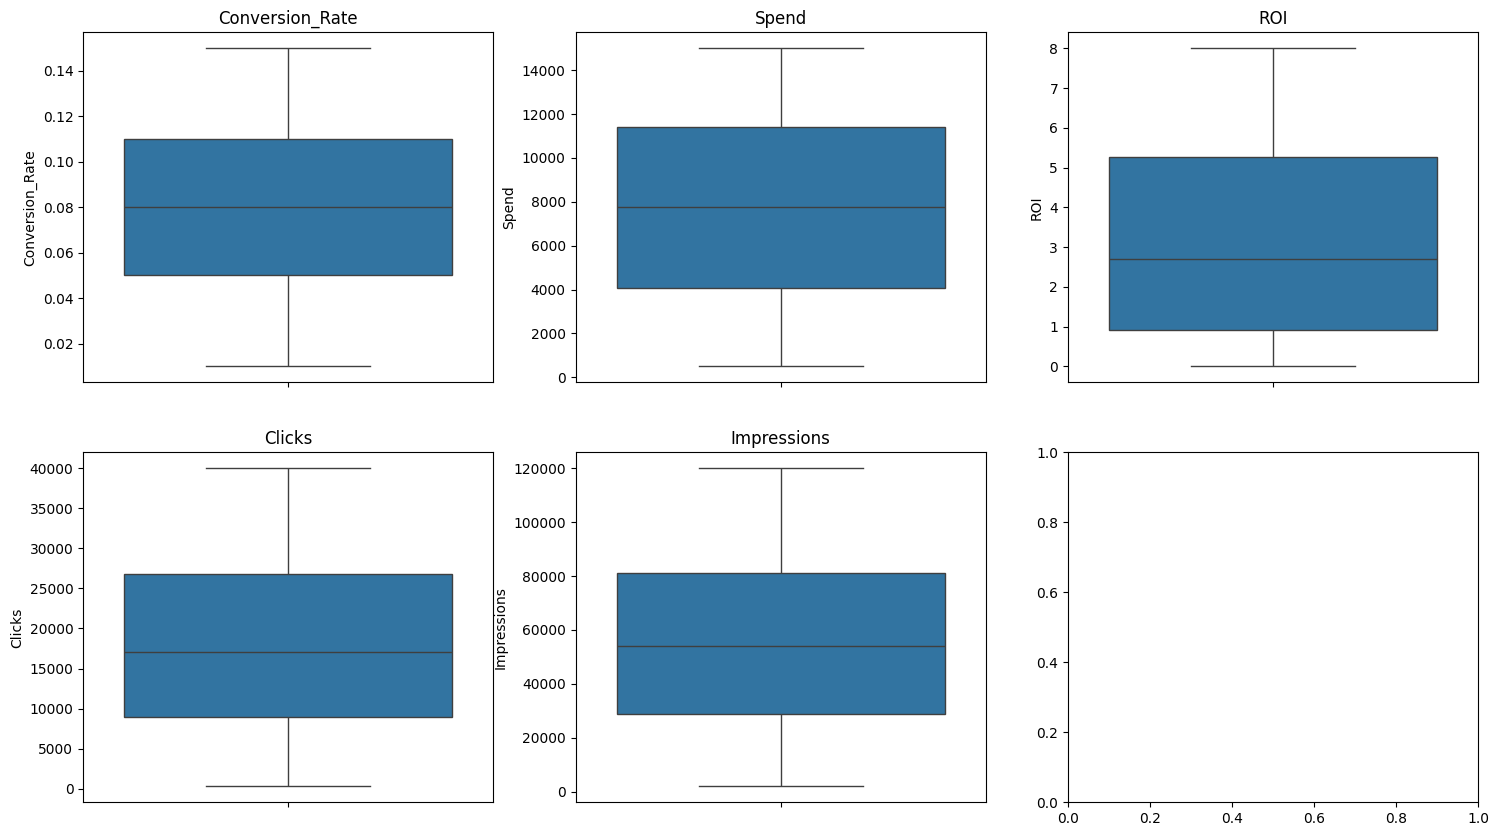

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()
for i, col in enumerate(data._get_numeric_data().drop(columns=["Campaign_ID"]).columns):
    sns.boxplot(data = data, y = data[col], ax = axs[i])
    axs[i].set_title(col)
plt.show()

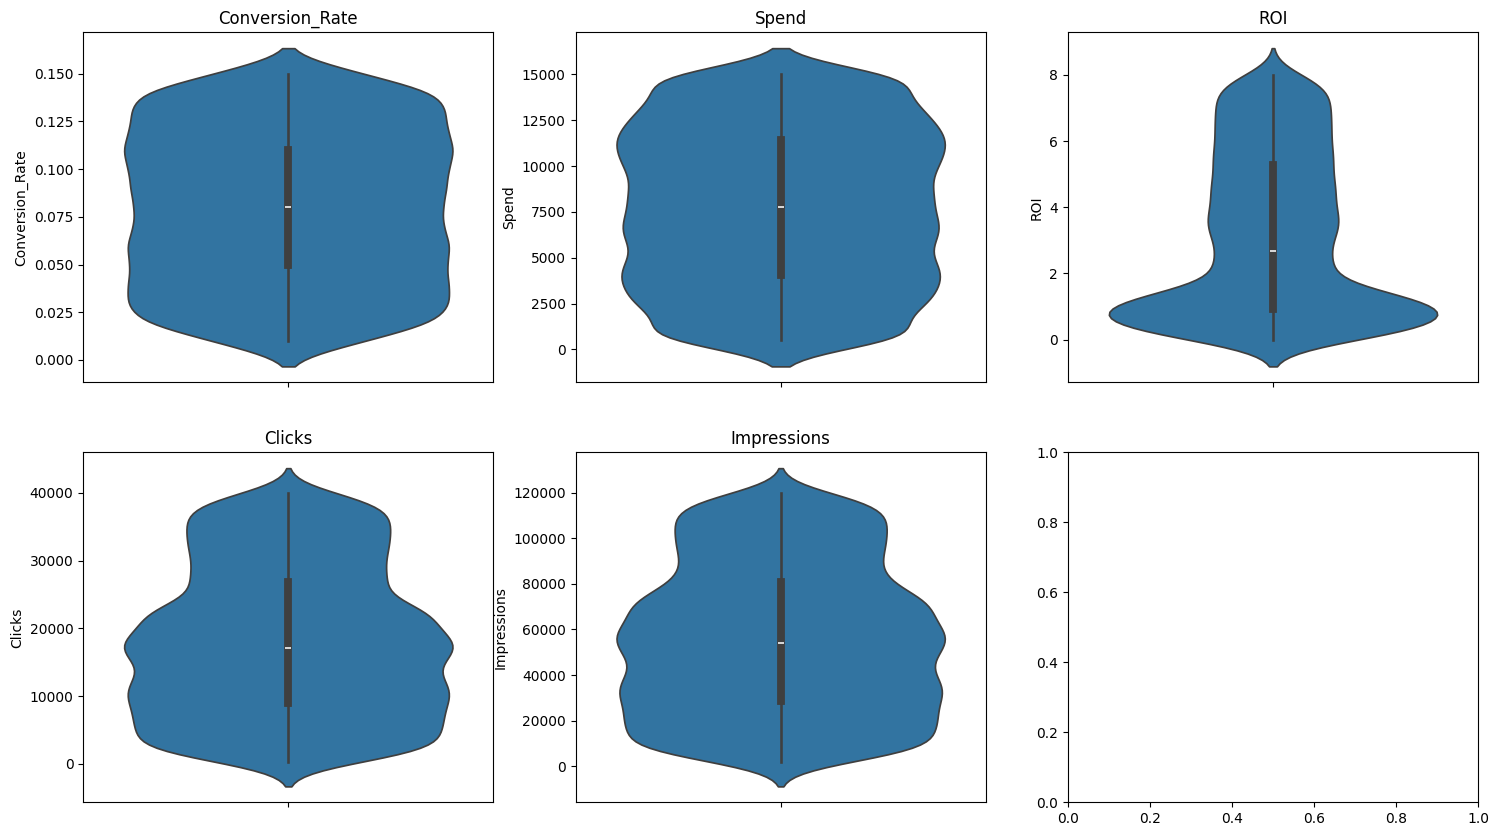

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()
for i, col in enumerate(data._get_numeric_data().drop(columns=["Campaign_ID"]).columns):
    sns.violinplot(y = col, data = data, ax=axs[i], orient='h')
    axs[i].set_title(col)
plt.show()

**Nhận xét:**
- Trừ `ROI` thì các dữ liệu còn lại không bị chênh lệch quá nhiều. `Conversion_Rate` và `Spend` phân bố khá đều, còn `Clicks` và `Impressions` lệch phải.
- Nhìn chung thì bộ dữ liệu không có outliers, không cần thực hiện các bước tiền xử lý để loại bỏ nhiễu.

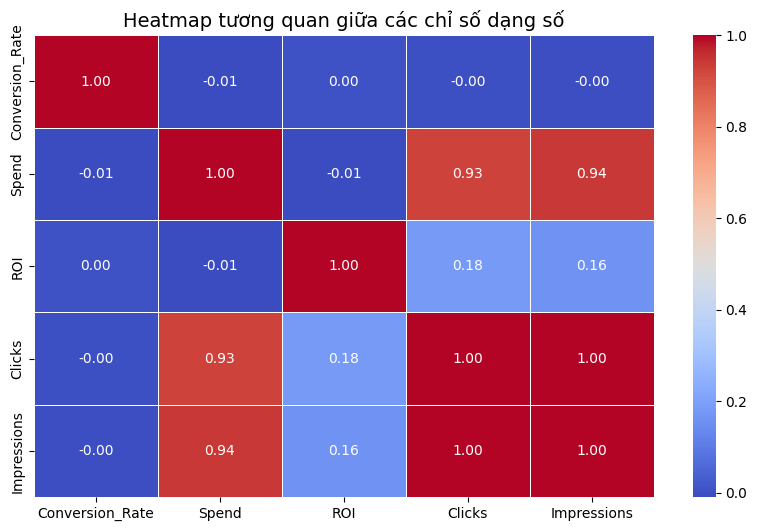

In [16]:
# Lấy các cột số
numeric_cols = data._get_numeric_data().drop(columns=["Campaign_ID"]).columns

# Tính ma trận tương quan
corr = data[numeric_cols].corr()

# Vẽ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap tương quan giữa các chỉ số dạng số", fontsize=14)
plt.show()

**Nhận xét:**
- Dữ liệu có những tương quan kỳ lạ, đặc biệt khi tỉ lệ `Clicks` / `Impressions` gần như cố định với correlation = 1.
- Nhiều cột gần như độc lập với nhau, không có tương quan nào với correlation = 0.

#### Đối với các cột kiểu categorical

In [18]:
def col_info(col, array):
    temp = pd.DataFrame(array[col])
    temp = temp.dropna()
    temp = np.array(temp[col])
    data = []
    # num_values
    temp = np.unique(temp, return_counts=True)
    data.append(len(temp[0]))
    # value
    temp = pd.Series(data = temp[1], index = temp[0])
    data.append(temp)
    # num_values
    return data

In [19]:
cat_col_info_df = pd.DataFrame(index = ['num_values', 'value'])
for i in data.select_dtypes(include=['string']):
    cat_col_info_df[i] = col_info(i, data)

cat_col_info_df

,Campaign_Goal,Duration,Channel_Used,Location,Language,Customer_Segment,Company,Gender,Age_Group
num_values,4,4,4,5,3,2,20,2,3
value,Brand Awareness 1983 Increase Sales 2022 Market Expansion 1953 Product Launch 2089 dtype: int64,15 Days 2042 30 Days 1982 45 Days 1998 60 Days 2025 dtype: int64,Facebook 1968 Instagram 2018 Pinterest 2020 Twitter 2041 dtype: int64,Austin 1593 Las Vegas 1653 Los Angeles 1677 Miami 1552 New York 1572 dtype: int64,English 2699 French 2682 Spanish 2666 dtype: int64,Fashion 4032 Food 4015 dtype: int64,Attire Artistry 389 Bistro Bliss 387 Chic Couture 403 Culinary Quest 393 Dine Divine 403 Epicurean Edge 393 Feast Flavors 419 Fiber Fashion 408 Gastronomy Guild 411 Glam Garments 393 Gourmet Grove 374 Mode Maven 403 Nosh Nirvana 430 Palate Paradise 400 Runway Rebels 386 Savor Street 405 Silk & Style 409 Style Sphere 398 Trend Tailors 416 Vogue Visions 427 dtype: int64,Men 4112 Women 3935 dtype: int64,18-24 2684 25-34 2705 35-44 2658 dtype: int64


Ta vẽ biểu đồ cột để trực quan sự phân bố các giá trị `categorical`.

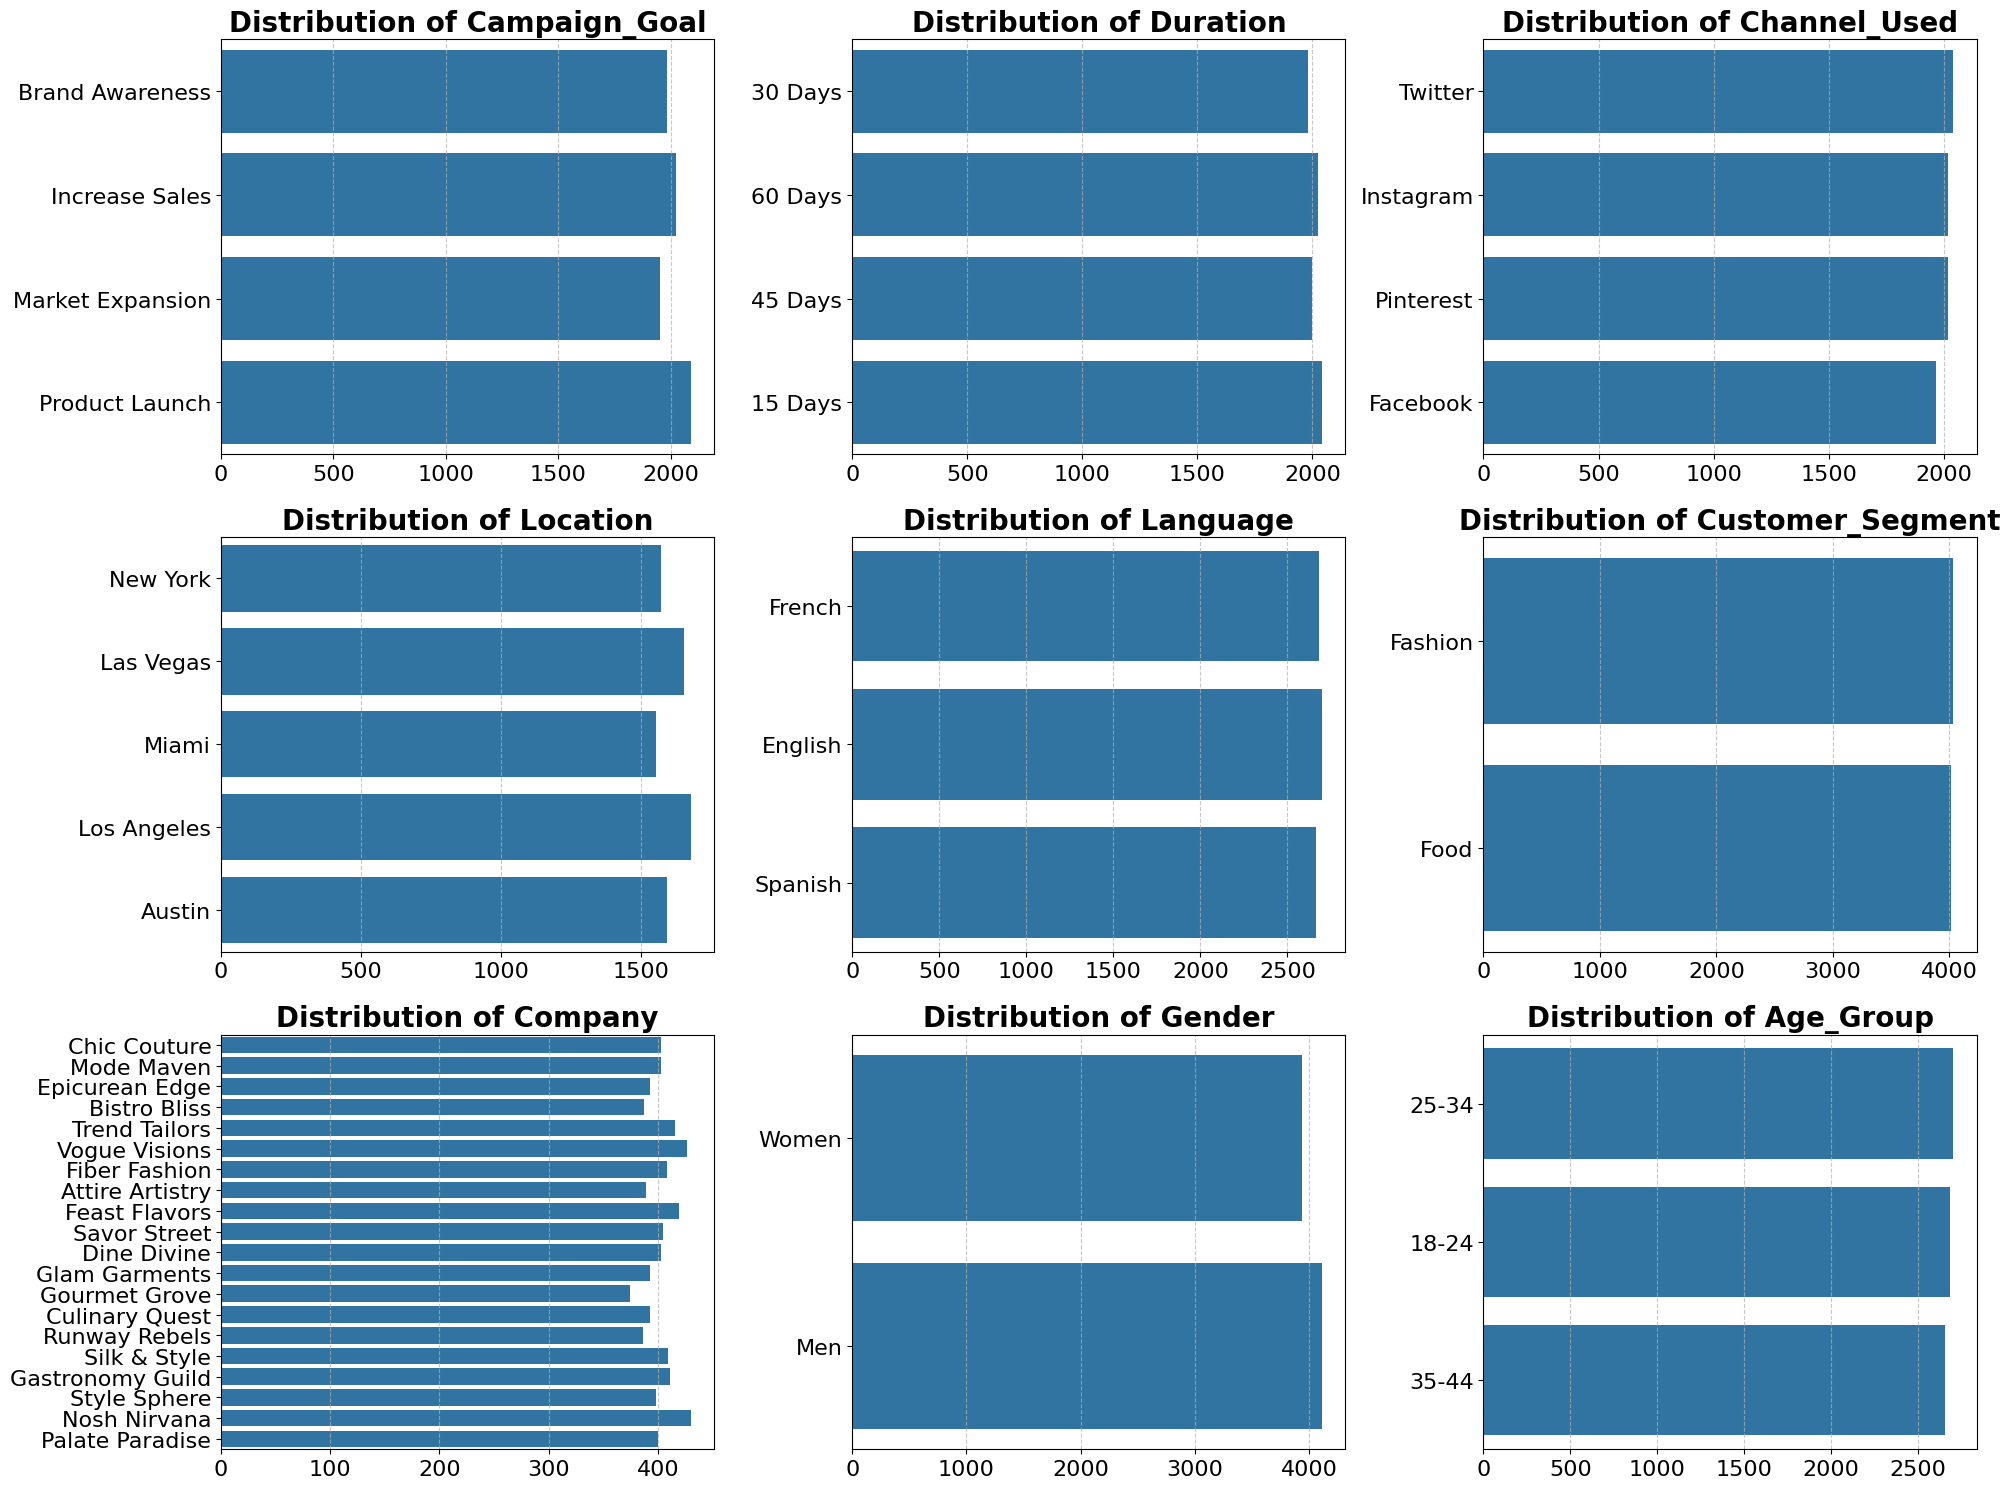

In [20]:
# Lọc các cột kiểu object nhưng không khớp với pattern
object_cols = [col for col in data.select_dtypes(include=['string']).columns]

# Xác định số hàng và số cột cho grid plot
n_cols = 3  # Số cột cố định
n_rows = len(object_cols) // n_cols  # Tính số hàng, làm tròn lên

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))  # Điều chỉnh chiều cao theo số hàng
axs = axs.flatten()  # Chuyển thành danh sách 1D để dễ truy cập

for i, col in enumerate(object_cols):
    sns.countplot(data=data, y=col, ax=axs[i])
    axs[i].set_title(f"Distribution of {col}", fontsize=20, fontweight="bold")  # Tăng size chữ tiêu đề
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    axs[i].tick_params(axis='both', labelsize=16)  # Tăng size chữ các giá trị trên trục
    axs[i].grid(True, axis='x', linestyle="--", alpha=0.7)  # Thêm đường lưới dọc

# Ẩn các subplot thừa (nếu có)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.subplots_adjust(hspace=0.2)  # Điều chỉnh khoảng cách giữa các hàng
plt.show()

**Nhận xét:**
- Các quan sát được thực hiện trên các đối tượng với số lượng như nhau (chênh lệch rất ít giữa các đối tượng), tuy nhiên điều này hơi bất hợp lý do trên thực tế các đối tượng không thể quá đạt mức cân bằng như vậy. Nguyên nhân là bởi chênh lệch giới tính thực tế, đối tượng chính sử dụng mạng xã hội,...

## 3. Khám phá dữ liệu - EDA

In [21]:
print(f"Dữ liệu được lấy từ {data['Date'].min().strftime('%d/%m/%Y')} đến {data['Date'].max().strftime('%d/%m/%Y')}")

Dữ liệu được lấy từ 01/01/2022 đến 31/12/2022


Như vậy bộ dữ liệu này là về các quảng cáo có mốc bắt đầu là **năm 2022**, được lấy từ **20 companies** đến từ **5 quốc gia**.

### Phần nội dung cho dashboard tổng quan về Advertisement

#### Các chỉ số chính (Key Metrics)  
Các chỉ số này được thể hiện kèm theo chênh lệch so với tháng trước (MoM – Month over Month) để đánh giá xu hướng tăng/giảm:  

- **Total Campaign**: Số chiến dịch marketing đã triển khai trong kỳ. Cho biết mức độ hoạt động quảng cáo, so sánh MoM giúp nhận diện xu hướng mở rộng hay thu hẹp.  

- **Total ROI**: Tổng lợi nhuận trên chi phí quảng cáo. Đo lường hiệu quả đầu tư quảng cáo, ROI tăng MoM cho thấy ngân sách được sử dụng hiệu quả hơn. 
$$
ROI = \frac{Doanh\ thu\ từ\ chiến\ dịch - Chi\ phí\ chiến\ dịch}{Chi\ phí\ chiến\ dịch} \times 100\% 
= \frac{Revenue - Spend}{Spend} \times 100\%
$$
 
- **Total Spend**: Tổng chi phí bỏ ra cho tất cả chiến dịch. Giúp theo dõi ngân sách thực tế, khi so với ROI và Revenue sẽ đánh giá được hiệu suất sử dụng chi phí.  

- **Average Conversion Rate (CR)**: Tỷ lệ khách hàng thực hiện hành động mong muốn trên tổng lượt tiếp cận. Thể hiện chất lượng và sức thuyết phục của quảng cáo.
$$
Conversion\ Rate = \frac{Số\ lượng\ chuyển\ đổi}{Tổng\ số\ lượt\ truy\ cập} \times 100\% 
= \frac{Conversions}{Clicks} \times 100\%
$$

- **Total Clicks**: Số lượt click vào quảng cáo, tín hiệu trực tiếp về mức độ quan tâm của khách hàng. Nếu clicks tăng nhưng CR thấp, cần xem lại trải nghiệm sau khi click.  

#### Các biểu đồ theo dõi dài hạn (theo năm)  

- **Total Campaign & Profit Margin by Segment**: So sánh số lượng chiến dịch và biên lợi nhuận theo từng phân khúc khách hàng/nhóm sản phẩm, giúp xác định phân khúc nào vừa được đầu tư nhiều, vừa mang lại lợi nhuận cao.  

- **Accumulate Profit & Revenue**: Biểu diễn doanh thu và lợi nhuận lũy kế theo thời gian, cho thấy tốc độ tăng trưởng và đánh giá sự bền vững của chiến lược marketing.  

- **Total Spend & ROI**: Theo dõi chi phí quảng cáo và hiệu quả ROI song song, giúp phát hiện thời điểm chi nhiều nhưng hiệu quả kém (burn ngân sách).  

- **Total Clicks & Impressions**: Theo dõi hành vi tiếp cận và tương tác với quảng cáo. Nếu impressions tăng nhưng clicks không đổi, có thể do nội dung quảng cáo chưa hấp dẫn.  


## 4. Câu Hỏi Phân Tích Chính

### 4.1. Campaign goal, target audience hoặc customer segment nào mang lại ROI, conversion rate cao nhất?

#### Nhóm quan sát (Category Variables)
- `Campaign_Goal`: tiêu chí thành công và định hướng cho toàn bộ hoạt động marketing, ví dụ: tăng nhận diện thương hiệu, thu hút khách hàng tiềm năng, hoặc tối ưu doanh thu.  
- `Target_Audience`: nhóm khách hàng mà chiến dịch hướng đến dựa trên đặc điểm nhân khẩu học, hành vi và sở thích.  
- `Customer_Segment`: phân nhóm khách hàng trong thị trường dựa trên các yếu tố như nhu cầu, giá trị, hoặc hành vi mua hàng.  

#### Nhóm chỉ số đánh giá (Performance Metrics)
- `ROI` **(Return on Investment)**: đo lường mức sinh lời của chiến dịch marketing so với chi phí đã bỏ ra.  

$$
ROI = \frac{Doanh\ thu\ từ\ chiến\ dịch - Chi\ phí\ chiến\ dịch}{Chi\ phí\ chiến\ dịch} \times 100\% 
= \frac{Revenue - Spend}{Spend} \times 100\%
$$

- `Conversion_Rate`: tỷ lệ khách hàng thực hiện hành động mong muốn (mua hàng, đăng ký, tải ứng dụng) so với tổng số người tiếp cận.  

$$
Conversion\ Rate = \frac{Số\ lượng\ chuyển\ đổi}{Tổng\ số\ lượt\ truy\ cập} \times 100\% 
= \frac{Conversions}{Clicks} \times 100\%
$$


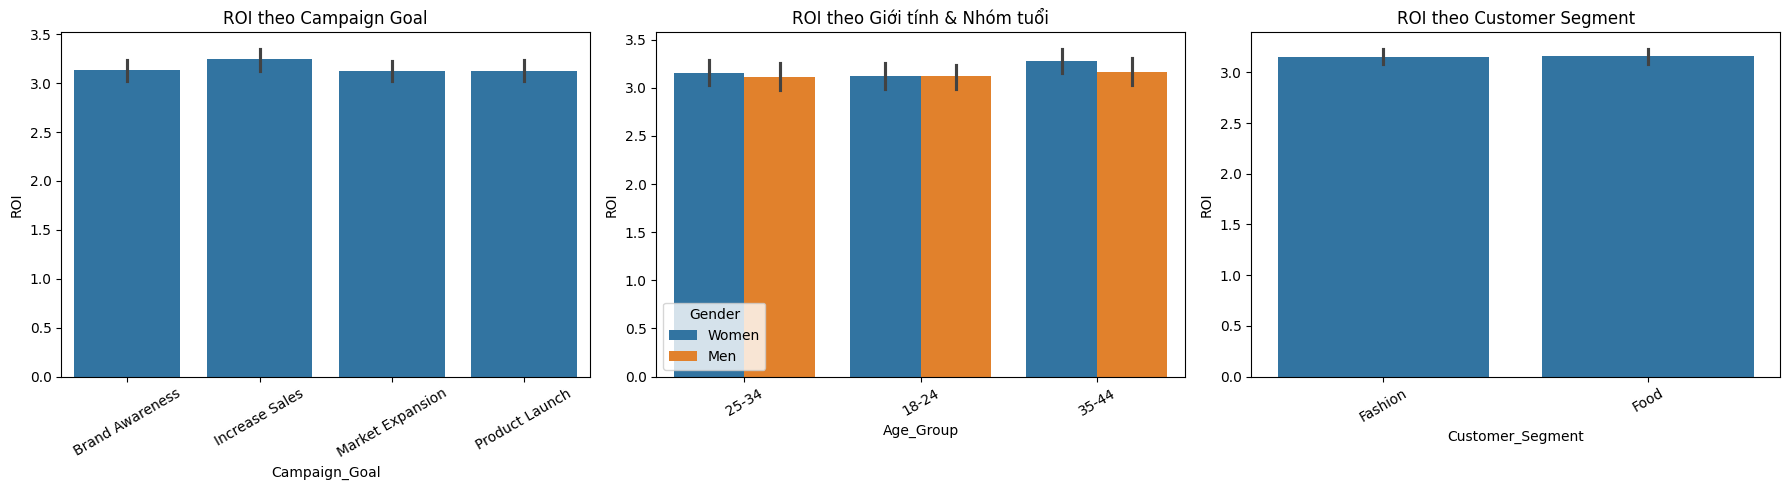

In [22]:
# --- Câu hỏi phụ 1: ROI ---
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# ROI theo Campaign_Goal
sns.barplot(data=data, x="Campaign_Goal", y="ROI", ax=axes[0])
axes[0].set_title("ROI theo Campaign Goal")
axes[0].tick_params(axis='x', rotation=30)

# ROI theo Gender & Age_Group
sns.barplot(data=data, x="Age_Group", y="ROI", hue="Gender", ax=axes[1])
axes[1].set_title("ROI theo Giới tính & Nhóm tuổi")
axes[1].tick_params(axis='x', rotation=30)

# ROI theo Customer_Segment
sns.barplot(data=data, x="Customer_Segment", y="ROI", ax=axes[2])
axes[2].set_title("ROI theo Customer Segment")
axes[2].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

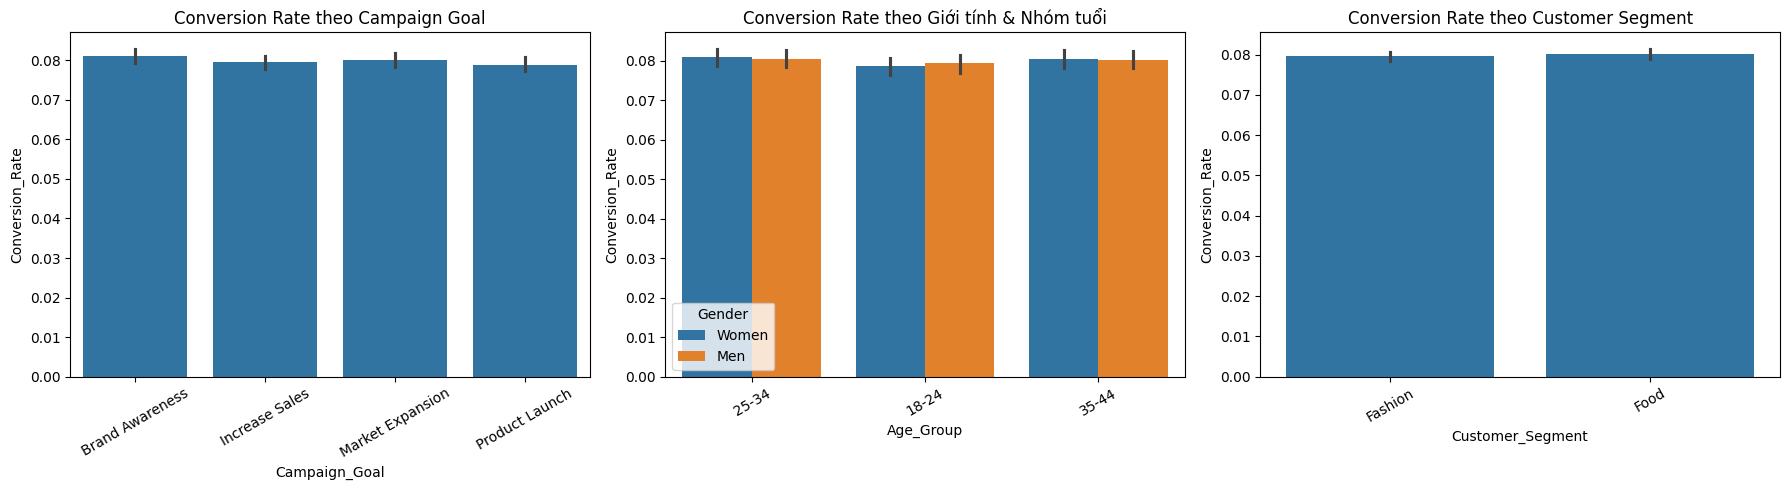

In [23]:
# --- Câu hỏi phụ 2: Conversion Rate ---
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# CR theo Campaign_Goal
sns.barplot(data=data, x="Campaign_Goal", y="Conversion_Rate", ax=axes[0])
axes[0].set_title("Conversion Rate theo Campaign Goal")
axes[0].tick_params(axis='x', rotation=30)

# CR theo Gender & Age_Group
sns.barplot(data=data, x="Age_Group", y="Conversion_Rate", hue="Gender", ax=axes[1])
axes[1].set_title("Conversion Rate theo Giới tính & Nhóm tuổi")
axes[1].tick_params(axis='x', rotation=30)

# CR theo Customer_Segment
sns.barplot(data=data, x="Customer_Segment", y="Conversion_Rate", ax=axes[2])
axes[2].set_title("Conversion Rate theo Customer Segment")
axes[2].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


### 4.2. Channel hoặc location nào là cost-effective nhất cho từng phân khúc?

#### Nhóm quan sát (Category Variables)
- `Channel_Used`: kênh phân phối/truyền thông mà chiến dịch sử dụng để tiếp cận khách hàng (social media, email marketing, cửa hàng trực tiếp, website, ...).  
- `Location`: khu vực địa lý hoặc thị trường cụ thể mà chiến dịch triển khai, có thể ảnh hưởng đến chi phí và hiệu quả do sự khác biệt về hành vi tiêu dùng và mức độ cạnh tranh.  
- `Customer_Segment`: phân khúc khách hàng theo nhu cầu/hành vi (Fashion, Food, ...).  

#### Nhóm chỉ số đánh giá (Performance Metrics)

- **Chi phí trên mỗi chuyển đổi (Cost per Conversion - `CPC`):**
$$
CPC = \frac{Spend}{Conversions} = \frac{Spend}{\frac{Conversion\_Rate}{100} \times Clicks}
$$

- **Chi phí trên mỗi khách hàng tiềm năng (Cost per Lead - `CPL`):**  
_Giả sử `Leads = Clicks`_
$$
CPL = \frac{Spend}{Leads} = \frac{Spend}{Clicks}
$$

- **Hiệu quả chi phí (Cost-effectiveness Ratio - `CER`):**
$$
CER = \frac{Spend}{Revenue}
$$

Trong đó:  
- `Spend`: tổng chi phí của chiến dịch.  
- `Conversions`: số lượng chuyển đổi, tính từ `Conversion_Rate` × `Clicks`.  
- `Leads`: số khách hàng tiềm năng, giả sử bằng `Clicks`.  
- `Revenue`: doanh thu tạo ra từ chiến dịch (tính sẵn hoặc ước lượng từ ROI).  

**Giải thích:** CER càng thấp thì `Channel_Used` hoặc `Location` càng **cost-effective** cho phân khúc khách hàng (`Customer_Segment`).  


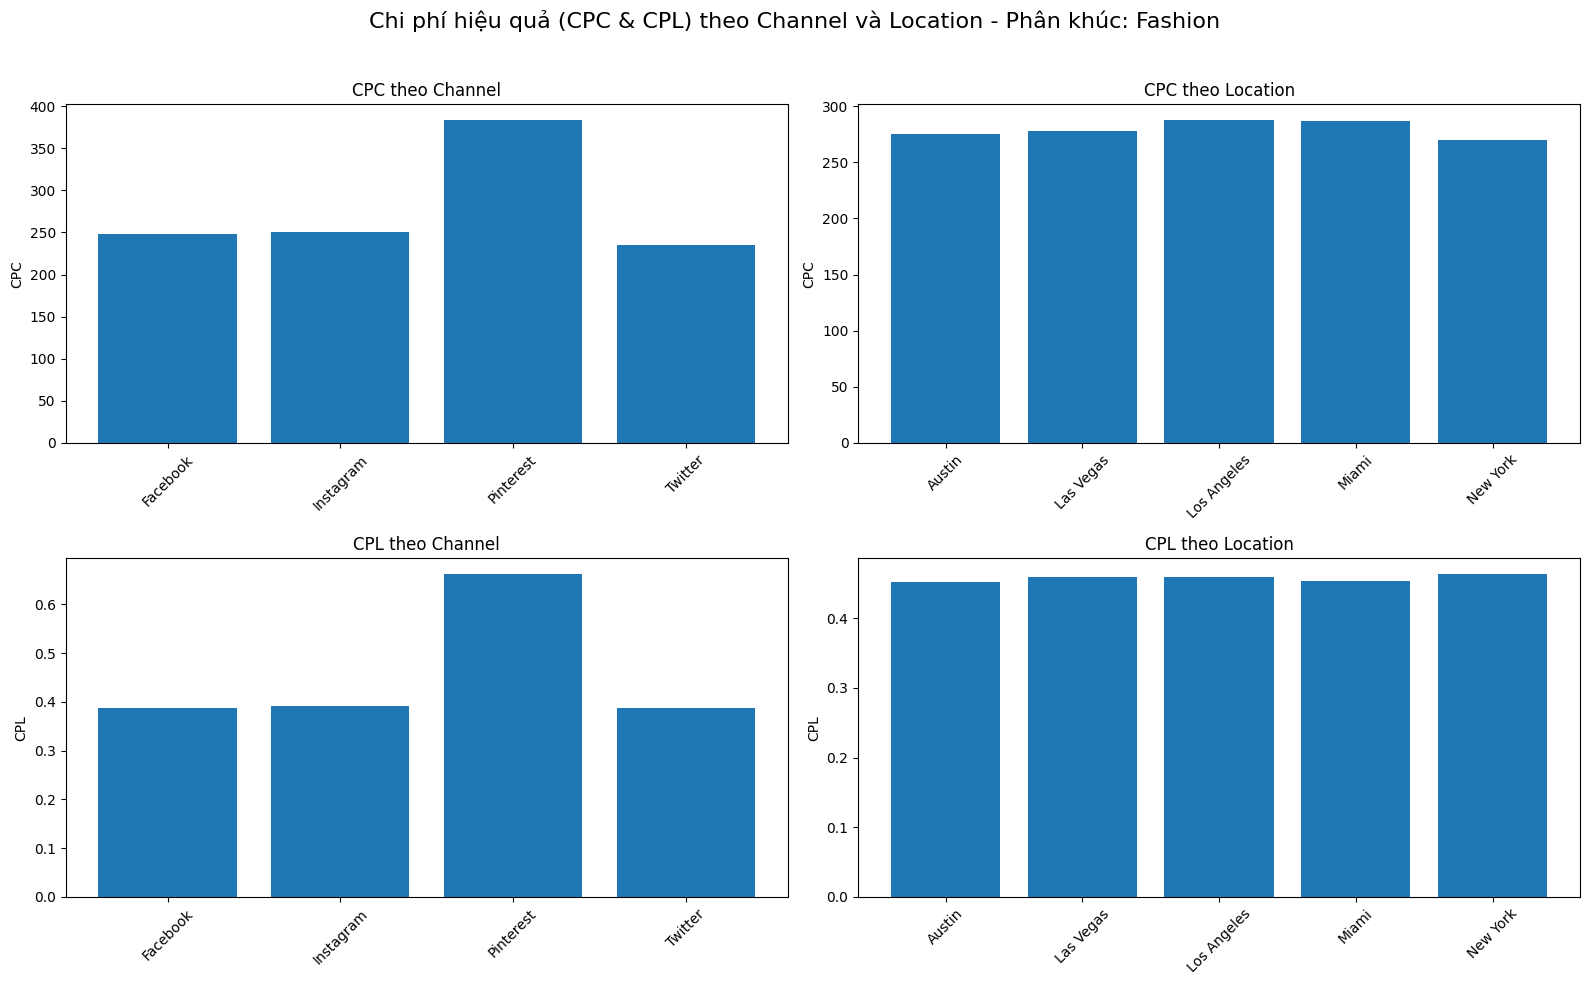

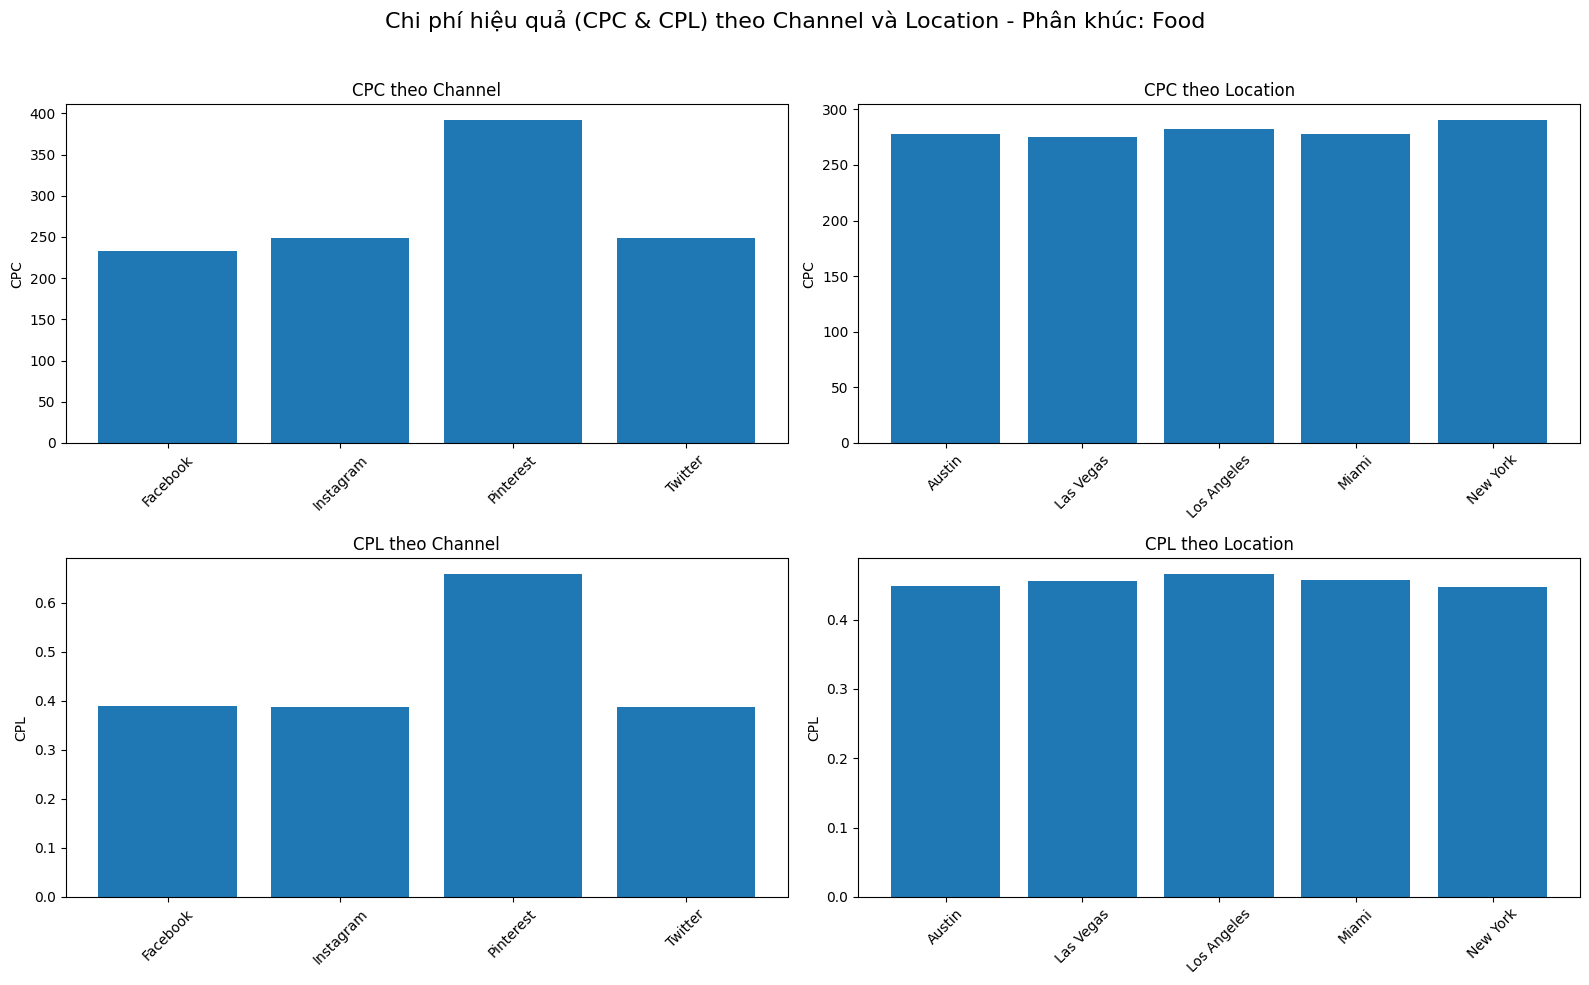

In [24]:
# 1. Tính toán các chỉ số
data["Conversions"] = (data["Conversion_Rate"] / 100) * data["Impressions"]
data["CPC"] = data["Spend"] / data["Conversions"].replace(0, pd.NA)
data["CPL"] = data["Spend"] / data["Clicks"].replace(0, pd.NA)

# 2. Gom nhóm
channel_summary = (
    data.groupby(["Customer_Segment", "Channel_Used"])
    [["CPC", "CPL"]]
    .mean()
    .reset_index()
)

location_summary = (
    data.groupby(["Customer_Segment", "Location"])
    [["CPC", "CPL"]]
    .mean()
    .reset_index()
)

# 3. Vẽ biểu đồ theo từng Customer_Segment
for segment in data["Customer_Segment"].unique():
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle(f"Chi phí hiệu quả (CPC & CPL) theo Channel và Location - Phân khúc: {segment}", fontsize=16)

    # Lấy dữ liệu con
    subset_channel = channel_summary[channel_summary["Customer_Segment"] == segment]
    subset_location = location_summary[location_summary["Customer_Segment"] == segment]

    # CPC theo Channel
    axes[0, 0].bar(subset_channel["Channel_Used"], subset_channel["CPC"])
    axes[0, 0].set_title("CPC theo Channel")
    axes[0, 0].set_ylabel("CPC")
    axes[0, 0].tick_params(axis='x', rotation=45)

    # CPC theo Location
    axes[0, 1].bar(subset_location["Location"], subset_location["CPC"])
    axes[0, 1].set_title("CPC theo Location")
    axes[0, 1].set_ylabel("CPC")
    axes[0, 1].tick_params(axis='x', rotation=45)

    # CPL theo Channel
    axes[1, 0].bar(subset_channel["Channel_Used"], subset_channel["CPL"])
    axes[1, 0].set_title("CPL theo Channel")
    axes[1, 0].set_ylabel("CPL")
    axes[1, 0].tick_params(axis='x', rotation=45)

    # CPL theo Location
    axes[1, 1].bar(subset_location["Location"], subset_location["CPL"])
    axes[1, 1].set_title("CPL theo Location")
    axes[1, 1].set_ylabel("CPL")
    axes[1, 1].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


### 4.3. Conversion rate thay đổi ra sao theo language, customer segment và channel?

#### Nhóm quan sát (Category Variables)
- `Language`: ngôn ngữ chiến dịch, phản ánh mức độ phù hợp của bản dịch, thông điệp và văn hóa.  
- `Customer_Segment`: phân khúc khách hàng, cho phép so sánh hành vi mua sắm giữa các nhóm (Fashion, Food, ...).  
- `Channel_Used`: kênh truyền thông, đo lường hiệu quả từng nền tảng (social media, email marketing, quảng cáo trả phí, ...).  

#### Nhóm chỉ số đánh giá (Performance Metrics)
- `Conversion_Rate`: tỷ lệ khách hàng thực hiện hành động mong muốn (mua hàng, đăng ký, tải ứng dụng) so với tổng số người tiếp cận.  

#### Giải thích
- `Conversions`: số lượng khách hàng thực hiện hành động mong muốn, có thể tính từ `Conversion_Rate × Impressions`.  
- `Impressions`: tổng số lượt hiển thị/truy cập.  
- `CR` thay đổi theo `Language`, `Customer_Segment` và `Channel_Used` giúp xác định yếu tố nào tạo ra hiệu quả cao nhất.  

**Mục tiêu:** Xác định ngôn ngữ, phân khúc khách hàng hoặc kênh truyền thông nào mang lại `CR` cao nhất để tối ưu hóa ngân sách và chiến lược marketing.  


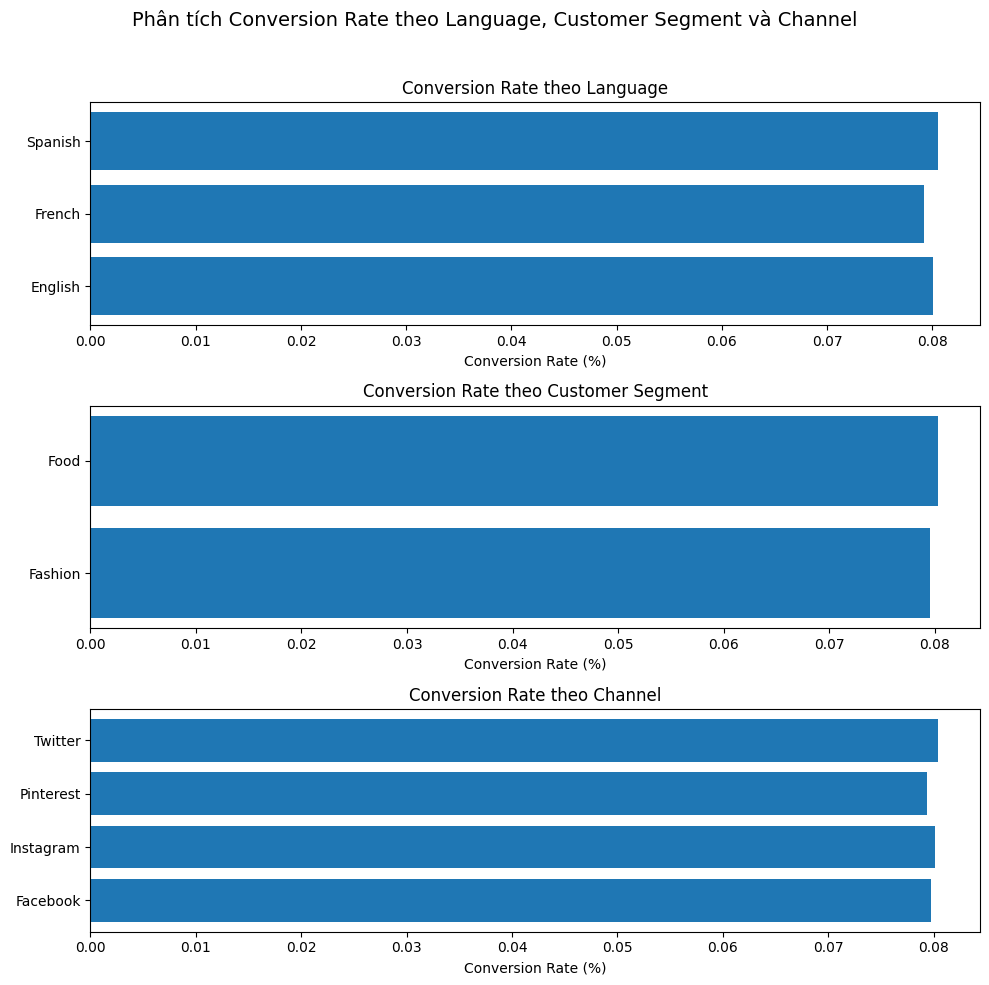

In [25]:
# Gom nhóm CR trung bình theo từng biến phân loại
cr_by_language = data.groupby("Language")["Conversion_Rate"].mean().reset_index()
cr_by_segment = data.groupby("Customer_Segment")["Conversion_Rate"].mean().reset_index()
cr_by_channel = data.groupby("Channel_Used")["Conversion_Rate"].mean().reset_index()

# Tạo layout 3x1
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle("Phân tích Conversion Rate theo Language, Customer Segment và Channel", fontsize=14)

# Biểu đồ 1: CR theo Language
axes[0].barh(cr_by_language["Language"], cr_by_language["Conversion_Rate"])
axes[0].set_title("Conversion Rate theo Language")
axes[0].set_xlabel("Conversion Rate (%)")

# Biểu đồ 2: CR theo Customer Segment
axes[1].barh(cr_by_segment["Customer_Segment"], cr_by_segment["Conversion_Rate"])
axes[1].set_title("Conversion Rate theo Customer Segment")
axes[1].set_xlabel("Conversion Rate (%)")

# Biểu đồ 3: CR theo Channel
axes[2].barh(cr_by_channel["Channel_Used"], cr_by_channel["Conversion_Rate"])
axes[2].set_title("Conversion Rate theo Channel")
axes[2].set_xlabel("Conversion Rate (%)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 4.4. Có xu hướng nào nổi bật về ad performance theo thời gian, mùa vụ?

#### Nhóm quan sát (Category Variables)
- `Date`: thời gian chạy campaign, dùng để phân tích xu hướng dài hạn hoặc biến động ngắn hạn.  
- `Duration`: thời lượng chiến dịch (30 Days, 60 Days, ...).  
- `Customer_Segment` hoặc `Campaign_Goal`: kết hợp để phân tích đặc thù theo mùa vụ và mục tiêu.  

#### Nhóm chỉ số đánh giá (Performance Metrics)
- `ROI` **(Return on Investment)**: đo lường mức sinh lời của chiến dịch marketing so với chi phí đã bỏ ra.  
- `Conversion_Rate`: tỷ lệ khách hàng thực hiện hành động mong muốn (mua hàng, đăng ký, tải ứng dụng) so với tổng số người tiếp cận.  

#### Ứng dụng phân tích
- **Theo thời gian (`Date`)**: phát hiện xu hướng tăng trưởng dài hạn hoặc biến động theo tuần/tháng.  
- **Theo mùa vụ (`Date` + `Customer_Segment`)**: phát hiện dịp cao điểm (Tết, Black Friday, lễ hội) để tập trung ngân sách.  
- **Theo ngành hàng (`Customer_Segment`)**: mỗi phân khúc có chu kỳ mùa vụ riêng, cần khai thác phù hợp.  


### 4.5. Có chiến dịch nào spend cao nhưng hiệu quả thấp (burn ngân sách)? Nguyên nhân?

#### Nhóm quan sát (Category Variables)
- `Campaign`: tên chiến dịch, đơn vị phân tích chính.  
- `Channel`: kênh phân phối quảng cáo (social media, email, paid ads).  
- `Customer_Segment`: phân khúc khách hàng mục tiêu.  

#### Nhóm chỉ số đánh giá (Performance Metrics)
- `Spend`: tổng chi phí bỏ ra cho chiến dịch.  
- `ROI` **(Return on Investment)**: đo lường hiệu quả lợi nhuận so với chi phí.  
- `Conversion_Rate`: tỷ lệ khách hàng thực hiện hành động mong muốn so với tổng số người tiếp cận.  

#### Ứng dụng phân tích
- Xác định ngưỡng **spend cao** (ví dụ: top 10% chiến dịch theo chi tiêu).  
- Xác định ngưỡng **hiệu quả thấp** (ROI < 0 hoặc Conversion Rate thấp hơn trung bình).  
- Lọc ra danh sách các chiến dịch thỏa cả hai điều kiện để tìm "burn ngân sách".  

**Công thức minh họa:**  

$$
\text{Burn\ Campaigns} = \{Campaign \ |\ Spend \geq P_{90}(Spend) \land ROI < 0 \}
$$  

#### Nguyên nhân có thể
- Lựa chọn **channel** không phù hợp với phân khúc khách hàng.  
- **Target audience** quá rộng hoặc không khớp với sản phẩm.  
- Nội dung quảng cáo chưa tối ưu → CTR thấp → Conversion thấp.  
- Thời điểm/mùa vụ không phù hợp.  
